# 第 9 章 EM 算法及其推广

### 期望极大算法 Expectation Maximization algorithm, EM 算法
### 极大似然函数 Maximum likehood function
### 高斯混合模型 Gaussian misture model
### 广义期望极大 Generalized Expectation Maximization algotithm, GEM 算法

In [7]:
import numpy as np
import math

In [9]:
pro_A, pro_B, por_C = 0.5, 0.5, 0.5

def pmf(i, pro_A, pro_B, por_C):
  pro_1 = pro_A * math.pow(pro_B, data[i]) * math.pow(
      (1 - pro_B), 1 - data[i])
  pro_2 = pro_A * math.pow(pro_C, data[i]) * math.pow(
      (1 - pro_C), 1 - data[i])
  return pro_1 / (pro_1 + pro_2)

In [10]:
# the design of class of Expectation Maximization Algorithm.
class EM:
  def __init__(self, prob):
      self.pro_A, self.pro_B, self.pro_C = prob

  # e_step
  def pmf(self, i):
      pro_1 = self.pro_A * math.pow(self.pro_B, data[i]) * math.pow((1 - self.pro_B), 1 - data[i])
      pro_2 = (1 - self.pro_A) * math.pow(self.pro_C, data[i]) * math.pow((1 - self.pro_C), 1 - data[i])
      return pro_1 / (pro_1 + pro_2)

  # m_step
  def fit(self, data):
      count = len(data)
      print('init prob:{}, {}, {}'.format(self.pro_A, self.pro_B, self.pro_C))
      for d in range(count):
          _ = yield
          _pmf = [self.pmf(k) for k in range(count)]
          pro_A = 1 / count * sum(_pmf)
          pro_B = sum([_pmf[k] * data[k] for k in range(count)]) / sum([_pmf[k] for k in range(count)])
          pro_C = sum([(1 - _pmf[k]) * data[k] for k in range(count)]) / sum([(1 - _pmf[k]) for k in range(count)])
          print('{}/{}  pro_a:{:.3f}, pro_b:{:.3f}, pro_c:{:.3f}'.format(d + 1, count, pro_A, pro_B, pro_C))
          self.pro_A = pro_A
          self.pro_B = pro_B
          self.pro_C = pro_C
# -----------------------------------
# TEST
data=[1,1,0,1,0,0,1,0,1,1]

em = EM(prob=[0.5, 0.5, 0.5])
f = em.fit(data)
next(f)

init prob:0.5, 0.5, 0.5


In [11]:
# 第一次迭代
f.send(1)

1/10  pro_a:0.500, pro_b:0.600, pro_c:0.600


In [12]:
# 第二次
f.send(2)

2/10  pro_a:0.500, pro_b:0.600, pro_c:0.600


In [13]:
em = EM(prob=[0.4, 0.6, 0.7])
f2 = em.fit(data)
next(f2)

init prob:0.4, 0.6, 0.7


In [14]:
f2.send(1)

1/10  pro_a:0.406, pro_b:0.537, pro_c:0.643


In [15]:
f2.send(2)

2/10  pro_a:0.406, pro_b:0.537, pro_c:0.643


## 习题 9.1

In [16]:
%matplotlib inline
import numpy as np
import math

class EM:
  def __init__(self, prob):
      self.pro_A, self.pro_B, self.pro_C = prob

  def pmf(self, i):
      pro_1 = self.pro_A * math.pow(self.pro_B, data[i]) * math.pow((1 - self.pro_B), 1 - data[i])
      pro_2 = (1 - self.pro_A) * math.pow(self.pro_C, data[i]) * math.pow((1 - self.pro_C), 1 - data[i])
      return pro_1 / (pro_1 + pro_2)

  def fit(self, data):
      print('init prob:{}, {}, {}'.format(self.pro_A, self.pro_B, self.pro_C))
      count = len(data)
      theta = 1
      d = 0
      while (theta > 0.00001):
          # 迭代阻塞
          _pmf = [self.pmf(k) for k in range(count)]
          pro_A = 1 / count * sum(_pmf)
          pro_B = sum([_pmf[k] * data[k] for k in range(count)]) / sum([_pmf[k] for k in range(count)])
          pro_C = sum([(1 - _pmf[k]) * data[k] for k in range(count)]) / sum([(1 - _pmf[k]) for k in range(count)])
          d += 1
          print('{}  pro_a:{:.4f}, pro_b:{:.4f}, pro_c:{:.4f}'.format(d, pro_A, pro_B, pro_C))
          theta = abs(self.pro_A - pro_A) + abs(self.pro_B - pro_B) + abs(self.pro_C - pro_C)
          self.pro_A = pro_A
          self.pro_B = pro_B
          self.pro_C = pro_C
          
# -----------------------------------
# TEST
# 加载数据
data = [1, 1, 0, 1, 0, 0, 1, 0, 1, 1]

em = EM(prob=[0.46, 0.55, 0.67])
f = em.fit(data)

init prob:0.46, 0.55, 0.67
1  pro_a:0.4619, pro_b:0.5346, pro_c:0.6561
2  pro_a:0.4619, pro_b:0.5346, pro_c:0.6561


## 习题 9.3

labels = [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
-----------------------------------------------


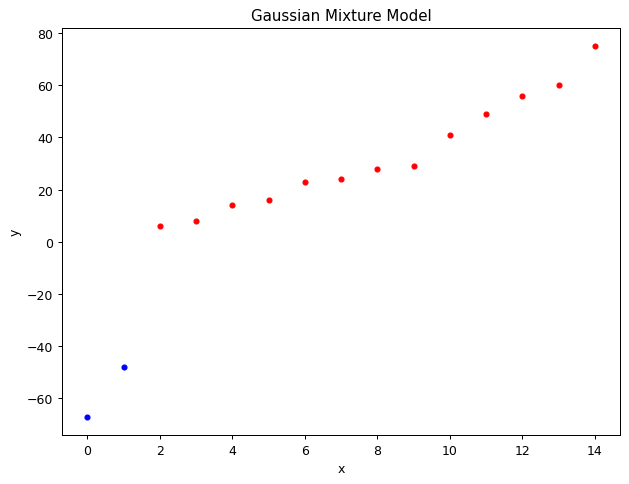

means = [[ 32.98488749 -57.51107674]]
covariances = [[429.45833107  90.24987868]]
weights =  [[0.86682772 0.13317228]]


In [20]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# 初始化观测数据
data = np.array([-67, -48, 6, 8, 14, 16, 23, 24, 28, 29, 41, 49, 56, 60, 75]).reshape(-1, 1)

# 聚类
gmmModel = GaussianMixture(n_components=2)
gmmModel.fit(data)
labels = gmmModel.predict(data)
print("labels =", labels)
print("-----------------------------------------------")

# visualization
fig = plt.figure(figsize = (8, 6), dpi=90)
for i in range(0, len(labels)):
  if labels[i] == 0:
      plt.scatter(i, data.take(i), s=15, c='red')
  elif labels[i] == 1:
      plt.scatter(i, data.take(i), s=15, c='blue')
plt.title('Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("means =", gmmModel.means_.reshape(1, -1))
print("covariances =", gmmModel.covariances_.reshape(1, -1))
print("weights = ", gmmModel.weights_.reshape(1, -1))